In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2

# Collecting and cleaning the data

In [3]:
snp = yf.download(tickers = "^GSPC",start = "2014-10-12",end ="2024-10-12",progress=False)

/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [4]:
snp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-13,1905.650024,1912.089966,1874.140015,1874.739990,1874.739990,4352580000
2014-10-14,1877.109985,1898.709961,1871.790039,1877.699951,1877.699951,4812010000
2014-10-15,1874.180054,1874.180054,1820.660034,1862.489990,1862.489990,6090800000
2014-10-16,1855.949951,1876.010010,1835.020020,1862.760010,1862.760010,5073150000
2014-10-17,1864.910034,1898.160034,1864.910034,1886.760010,1886.760010,4482120000


In [5]:
snp.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,3269.471284,3286.996036,3250.694894,3270.042849,3270.042849,3.999626e+09
std,1029.953863,1035.556554,1024.279755,1030.247200,1030.247200,9.542394e+08
min,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,1.296530e+09
25%,2370.340088,2378.360107,2358.580078,2368.389893,2368.389893,3.419850e+09
50%,2939.500000,2953.739990,2923.360107,2940.250000,2940.250000,3.814080e+09
75%,4149.779785,4169.810059,4123.689941,4151.319824,4151.319824,4.336660e+09
max,5778.359863,5822.129883,5775.089844,5815.029785,5815.029785,9.976520e+09


In [6]:
snp.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

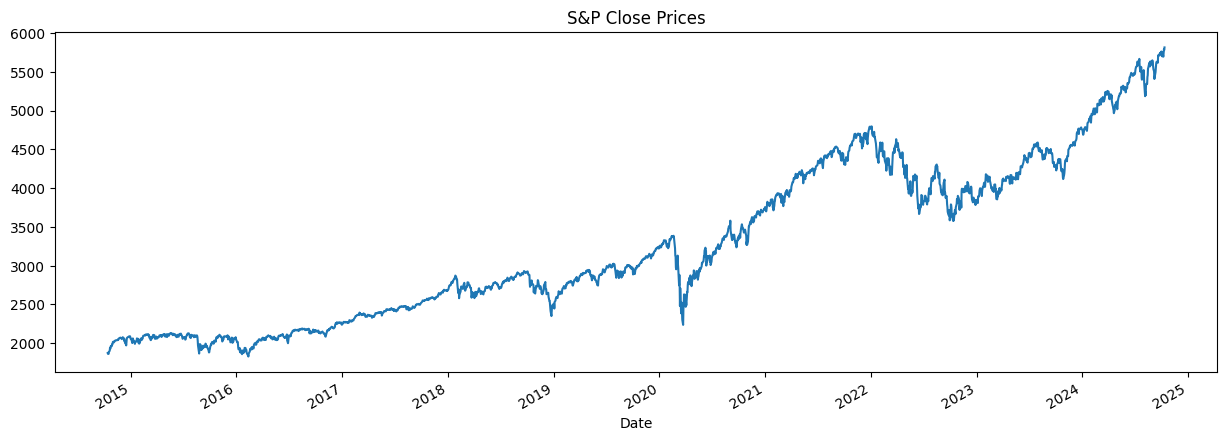

In [7]:
snp.Close.plot(figsize=(15,5),title = "S&P Close Prices")
plt.show()

In [8]:
snp=snp.asfreq('b')

In [9]:
snp.isna().sum()

Open         93
High         93
Low          93
Close        93
Adj Close    93
Volume       93
dtype: int64

In [10]:
snp= snp.fillna(method='ffill')
snp.isna().sum()

/var/folders/zq/5qswcr_s34d2y5t889_6rtb40000gn/T/ipykernel_29714/1425282703.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  snp= snp.fillna(method='ffill')


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
snp = snp.loc[:, ['Close']]
snp.head()

,Close
Date,
2014-10-13,1874.739990
2014-10-14,1877.699951
2014-10-15,1862.489990
2014-10-16,1862.760010
2014-10-17,1886.760010


# splitting the Data

In [12]:
size = int(len(snp)*0.8)

In [13]:
snp_train=snp.iloc[:size]

In [14]:
snp_test=snp.iloc[size:]

In [15]:
snp_train.tail()

,Close
Date,
2022-10-06,3744.520020
2022-10-07,3639.659912
2022-10-10,3612.389893
2022-10-11,3588.840088
2022-10-12,3577.030029


In [16]:
snp_test.head()

,Close
Date,
2022-10-13,3669.909912
2022-10-14,3583.070068
2022-10-17,3677.949951
2022-10-18,3719.979980
2022-10-19,3695.159912


# White noise

In [17]:
wn = np.random.normal(loc = snp_train.Close.mean(), scale = snp_train.Close.std(), size = len(snp_train))

In [18]:
snp_train['wn'] = wn

/var/folders/zq/5qswcr_s34d2y5t889_6rtb40000gn/T/ipykernel_29714/3309267560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snp_train['wn'] = wn


In [19]:
snp_train

,Close,wn
Date,,
2014-10-13,1874.739990,2542.364593
2014-10-14,1877.699951,3354.408293
2014-10-15,1862.489990,2378.638790
2014-10-16,1862.760010,3675.181949
2014-10-17,1886.760010,4184.402589
...,...,...
2022-10-06,3744.520020,3199.899825
2022-10-07,3639.659912,2696.333396
2022-10-10,3612.389893,2228.868659


In [20]:
snp_train.describe()

,Close,wn
count,2088.000000,2088.000000
mean,2929.834435,2922.778512
std,812.532871,809.024854
min,1829.079956,233.453593
25%,2173.455078,2379.831145
50%,2751.650024,2938.726744
75%,3443.484985,3456.846266
max,4796.560059,5599.392213


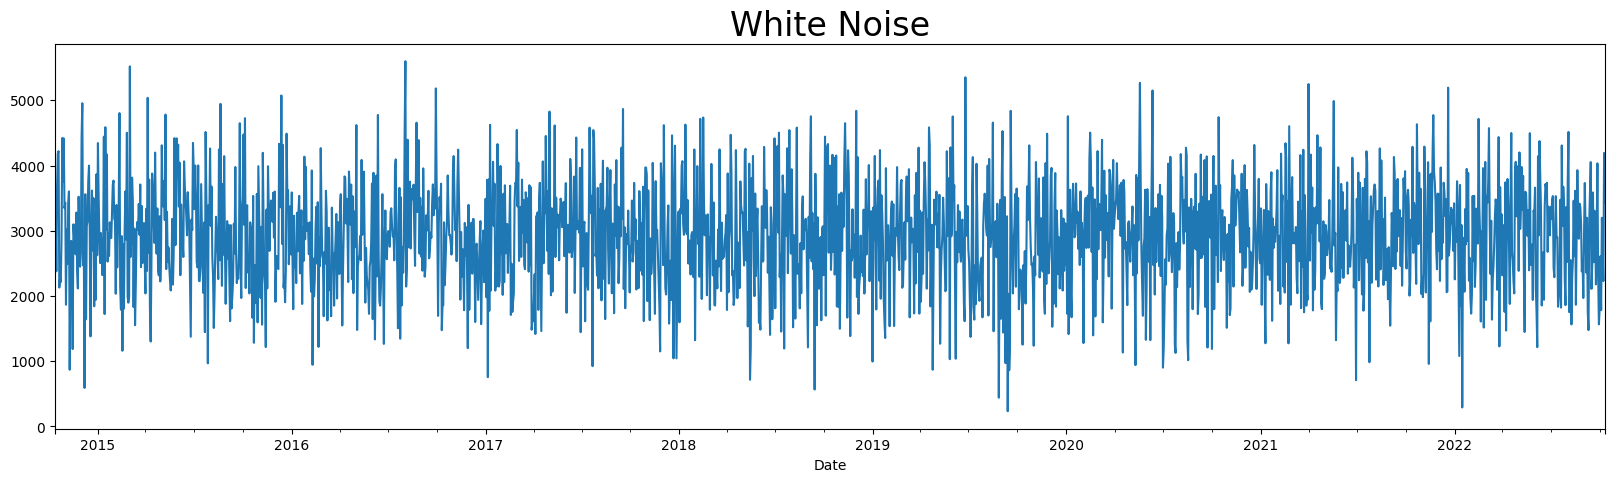

In [21]:
snp_train.wn.plot(figsize=(20,5))
plt.title('White Noise', size=24)
plt.show()

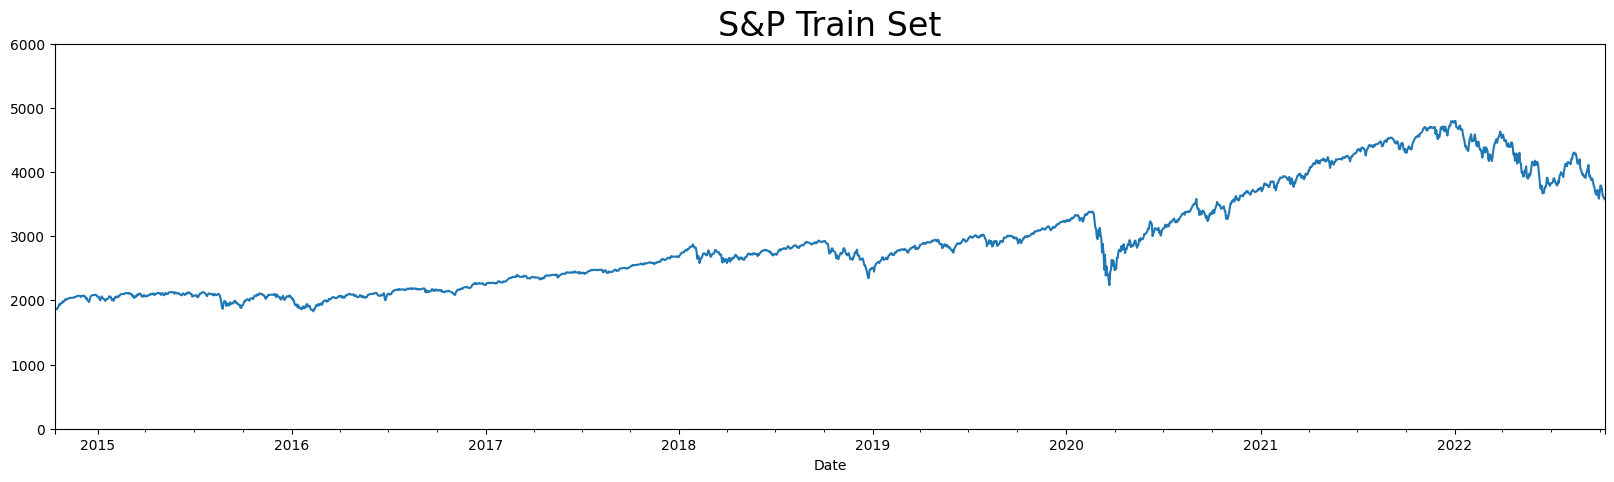

In [22]:
snp_train.Close.plot(figsize=(20,5))
plt.title('S&P Train Set', size=24)
plt.ylim(0,6000)
plt.show()

# Stationarity test

In [23]:
sts.adfuller(snp_train.Close)

(-1.0421496819899576,
 0.7375825658774994,
 25,
 2062,
 {'1%': -3.4335252955005657,
  '5%': -2.8629426977513854,
  '10%': -2.567516732429506},
 20418.603537076593)

In [24]:
sts.adfuller(snp_train.wn)

(-46.159197408922715,
 0.0,
 0,
 2087,
 {'1%': -3.4334872119603324,
  '5%': -2.862925883058088,
  '10%': -2.567507779564507},
 33446.35035610835)

# Autocorrelation function

<function matplotlib.pyplot.show(close=None, block=None)>

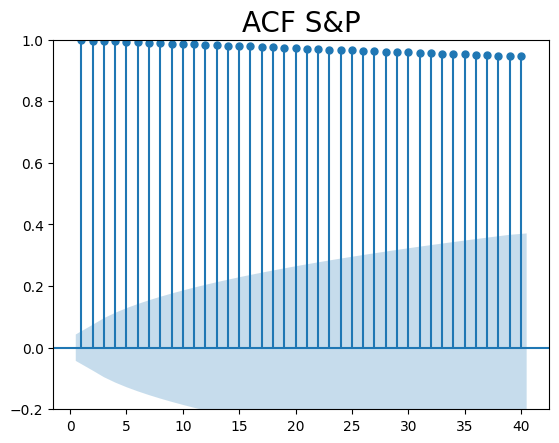

In [25]:
sgt.plot_acf(snp_train.Close,lags=40,zero=False)
plt.title("ACF S&P",size=20)
plt.ylim(-0.2,1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

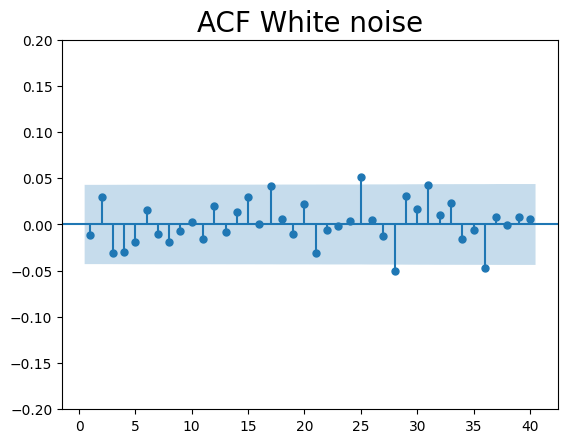

In [26]:
sgt.plot_acf(snp_train.wn,lags=40,zero=False)
plt.title("ACF White noise",size=20)
plt.ylim(-0.2,0.2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

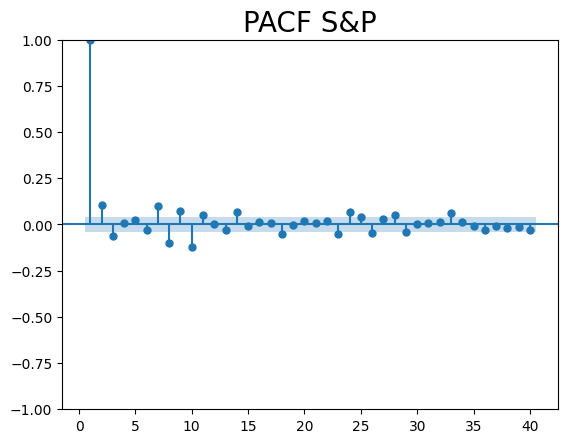

In [27]:
sgt.plot_pacf(snp_train.Close,lags=40,zero=False, method = ('ols'))
plt.title("PACF S&P",size=20)
plt.show

# AR Models

In [116]:
model_ar = ARIMA(snp_train.Close, order = (1,0,0))

In [117]:
results_ar = model_ar.fit()

In [118]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2087
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -10386.694
Date:                Wed, 30 Oct 2024   AIC                          20779.388
Time:                        18:25:41   BIC                          20796.318
Sample:                    10-14-2014   HQIC                         20785.591
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2930.3218    484.489      6.048      0.000    1980.740    3879.904
ar.L1          0.9990      0.001   1225.069      0.000       0.997       1.001
sigma2      1227.5711     15.538     79.007      0.000    1197.118    1258.024
===================================================================================
Ljung-Box (L1) (Q):                  23.73   Jarque-Bera (JB):              9885.18
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              10.30   Skew:                            -0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
model_ar_2 = ARIMA(snp_train.Close, order = (2,0,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2088
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -10379.428
Date:                Wed, 30 Oct 2024   AIC                          20766.857
Time:                        18:19:16   BIC                          20789.433
Sample:                    10-13-2014   HQIC                         20775.128
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2929.8344    396.616      7.387      0.000    2152.481    3707.188
ar.L1          0.8926      0.010     93.443      0.000       0.874       0.911
ar.L2          0.1063      0.010     11.137      0.000       0.088       0.125
sigma2      1213.3017     16.471     73.661      0.000    1181.018    1245.585
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              8337.64
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               9.97   Skew:                            -0.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
model_ar_3 = ARIMA(snp_train.Close, order = (3,0,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2088
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -10375.162
Date:                Wed, 30 Oct 2024   AIC                          20760.324
Time:                        18:19:16   BIC                          20788.544
Sample:                    10-13-2014   HQIC                         20770.663
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2929.8344    397.060      7.379      0.000    2151.611    3708.058
ar.L1          0.8994      0.010     89.159      0.000       0.880       0.919
ar.L2          0.1632      0.011     14.215      0.000       0.141       0.186
ar.L3         -0.0638      0.010     -6.708      0.000      -0.082      -0.045
sigma2      1208.8149     16.441     73.525      0.000    1176.591    1241.038
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7876.63
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               9.82   Skew:                            -0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
model_ar_4 = ARIMA(snp_train.Close, order = (4,0,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2088
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -10375.096
Date:                Wed, 30 Oct 2024   AIC                          20762.191
Time:                        18:19:16   BIC                          20796.055
Sample:                    10-13-2014   HQIC                         20774.598
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2929.8344    398.059      7.360      0.000    2149.652    3710.016
ar.L1          0.8999      0.010     89.088      0.000       0.880       0.920
ar.L2          0.1619      0.012     13.986      0.000       0.139       0.185
ar.L3         -0.0711      0.013     -5.681      0.000      -0.096      -0.047
ar.L4          0.0082      0.010      0.796      0.426      -0.012       0.028
sigma2      1209.3087     17.088     70.770      0.000    1175.817    1242.800
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8011.51
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               9.83   Skew:                            -0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Likelihood ratio test

In [34]:
def LLR_test(mod_1,mod_2, DF =1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p_value = chi2.sf(LR,DF).round(3)
    return p_value

In [35]:
LLR_test(model_ar_2,model_ar_3)

0.003

In [36]:
LLR_test(model_ar_3,model_ar_4)

0.716

In [37]:
model_ar_4 = ARIMA(snp_train.Close, order = (4,0,0))
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())
print("LLR test p-value : "+str(LLR_test(model_ar_3,model_ar_4)))

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2088
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -10375.096
Date:                Wed, 30 Oct 2024   AIC                          20762.191
Time:                        18:19:17   BIC                          20796.055
Sample:                    10-13-2014   HQIC                         20774.598
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2929.8344    398.059      7.360      0.000    2149.652    3710.016
ar.L1          0.8999      0.010     89.088      0.000       0.880       0.920
ar.L2          0.1619      0.012     13.986      0.0

In [38]:
 model_ar_5 = ARIMA(snp_train.Close, order = (5,0,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("LLR test p-value : "+str(LLR_test(model_ar_4,model_ar_5)))

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2088
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -10374.389
Date:                Wed, 30 Oct 2024   AIC                          20762.778
Time:                        18:19:17   BIC                          20802.286
Sample:                    10-13-2014   HQIC                         20777.253
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2929.8342    407.207      7.195      0.000    2131.722    3727.946
ar.L1          0.8997      0.011     84.435      0.000       0.879       0.921
ar.L2          0.1637      0.012     13.850      0.0

In [39]:
model_ar_6 = ARIMA(snp_train.Close, order = (6,0,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("LLR test p-value : "+str(LLR_test(model_ar_5,model_ar_6)))

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2088
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -10373.545
Date:                Wed, 30 Oct 2024   AIC                          20763.090
Time:                        18:19:18   BIC                          20808.241
Sample:                    10-13-2014   HQIC                         20779.632
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2929.8344    411.962      7.112      0.000    2122.404    3737.265
ar.L1          0.9005      0.011     84.169      0.000       0.880       0.921
ar.L2          0.1633      0.012     13.346      0.0

In [40]:
model_ar_7 = ARIMA(snp_train.Close, order = (7,0,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("LLR test p-value : "+str(LLR_test(model_ar_6,model_ar_7)))

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2088
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -10363.732
Date:                Wed, 30 Oct 2024   AIC                          20745.463
Time:                        18:19:19   BIC                          20796.259
Sample:                    10-13-2014   HQIC                         20764.074
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2929.8344    424.175      6.907      0.000    2098.466    3761.203
ar.L1          0.9033      0.011     84.652      0.000       0.882       0.924
ar.L2          0.1583      0.013     12.314      0.0

In [41]:
model_ar_8 = ARIMA(snp_train.Close, order = (8,0,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("LLR test p-value : "+str(LLR_test(model_ar_7,model_ar_8)))

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2088
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -10353.586
Date:                Wed, 30 Oct 2024   AIC                          20727.172
Time:                        18:19:19   BIC                          20783.612
Sample:                    10-13-2014   HQIC                         20747.851
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2929.8344    423.272      6.922      0.000    2100.236    3759.433
ar.L1          0.9128      0.011     82.863      0.000       0.891       0.934
ar.L2          0.1469      0.013     11.335      0.0

In [42]:
model_ar_9 = ARIMA(snp_train.Close, order = (9,0,0))
results_ar_9 = model_ar_9.fit()
print(results_ar_9.summary())
print("LLR test p-value : "+str(LLR_test(model_ar_8,model_ar_9)))

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2088
Model:                 ARIMA(9, 0, 0)   Log Likelihood              -10348.069
Date:                Wed, 30 Oct 2024   AIC                          20718.138
Time:                        18:19:20   BIC                          20780.221
Sample:                    10-13-2014   HQIC                         20740.884
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2929.8344    426.010      6.877      0.000    2094.869    3764.800
ar.L1          0.9200      0.011     81.522      0.000       0.898       0.942
ar.L2          0.1334      0.013     10.163      0.0

In [43]:
model_ar_10 = ARIMA(snp_train.Close, order = (10,0,0))
results_ar_10 = model_ar_10.fit()
print(results_ar_10.summary())
print("LLR test p-value : "+str(LLR_test(model_ar_9,model_ar_10)))

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2088
Model:                ARIMA(10, 0, 0)   Log Likelihood              -10332.017
Date:                Wed, 30 Oct 2024   AIC                          20688.033
Time:                        18:19:21   BIC                          20755.761
Sample:                    10-13-2014   HQIC                         20712.847
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2929.8344    434.312      6.746      0.000    2078.599    3781.070
ar.L1          0.9290      0.012     79.965      0.000       0.906       0.952
ar.L2          0.1130      0.014      8.105      0.0

In [44]:
model_ar_11 = ARIMA(snp_train.Close, order = (11,0,0))
results_ar_11 = model_ar_11.fit()
print(results_ar_11.summary())
print("LLR test p-value : "+str(LLR_test(model_ar_10,model_ar_11)))

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2088
Model:                ARIMA(11, 0, 0)   Log Likelihood              -10329.471
Date:                Wed, 30 Oct 2024   AIC                          20684.941
Time:                        18:19:23   BIC                          20758.313
Sample:                    10-13-2014   HQIC                         20711.823
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2929.8343    433.425      6.760      0.000    2080.338    3779.331
ar.L1          0.9351      0.012     77.311      0.000       0.911       0.959
ar.L2          0.1037      0.015      7.035      0.0

In [45]:
model_ar_12 = ARIMA(snp_train.Close, order = (12,0,0))
results_ar_12 = model_ar_12.fit()
print(results_ar_12.summary())
print("LLR test p-value : "+str(LLR_test(model_ar_11,model_ar_12)))

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2088
Model:                ARIMA(12, 0, 0)   Log Likelihood              -10329.464
Date:                Wed, 30 Oct 2024   AIC                          20686.927
Time:                        18:19:25   BIC                          20765.943
Sample:                    10-13-2014   HQIC                         20715.877
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2929.8344    440.778      6.647      0.000    2065.926    3793.743
ar.L1          0.9350      0.012     76.993      0.000       0.911       0.959
ar.L2          0.1042      0.015      6.950      0.0

In [46]:
print("LLR test : "+ str(LLR_test(model_ar,model_ar_11, DF =10)))

LLR test : 0.0


# Using returns

In [47]:
snp_train['returns'] = snp_train.Close.pct_change()
snp_train=snp_train.iloc[1:]
snp_train

/var/folders/zq/5qswcr_s34d2y5t889_6rtb40000gn/T/ipykernel_29714/2759323394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snp_train['returns'] = snp_train.Close.pct_change()


,Close,wn,returns
Date,,,
2014-10-14,1877.699951,3354.408293,0.001579
2014-10-15,1862.489990,2378.638790,-0.008100
2014-10-16,1862.760010,3675.181949,0.000145
2014-10-17,1886.760010,4184.402589,0.012884
2014-10-20,1904.010010,4220.108548,0.009143
...,...,...,...
2022-10-06,3744.520020,3199.899825,-0.010245
2022-10-07,3639.659912,2696.333396,-0.028004
2022-10-10,3612.389893,2228.868659,-0.007492


In [48]:
sts.adfuller(snp_train.returns)

(-9.625227991428792,
 1.66756005821009e-16,
 26,
 2060,
 {'1%': -3.4335283821660165,
  '5%': -2.8629440605704812,
  '10%': -2.567517458054482},
 -12702.986030943379)

<function matplotlib.pyplot.show(close=None, block=None)>

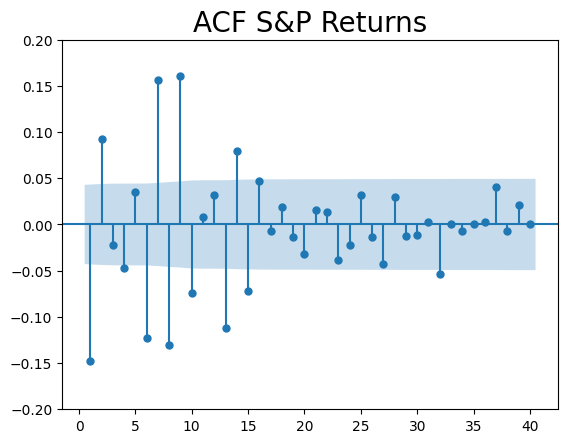

In [49]:
sgt.plot_acf(snp_train.returns,lags=40,zero=False)
plt.title("ACF S&P Returns",size=20)
plt.ylim(-0.2,0.2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

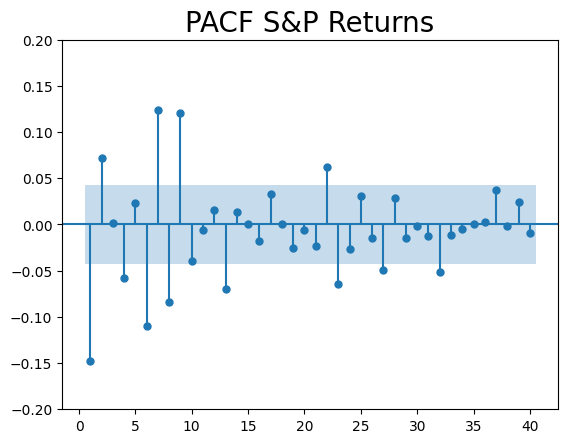

In [50]:
sgt.plot_pacf(snp_train.returns,lags=40,zero=False)
plt.title("PACF S&P Returns",size=20)
plt.ylim(-0.2,0.2)
plt.show

# AR for Returns

In [51]:
model_ret_ar_1 = ARIMA(snp_train.returns, order = (1,0,0))
results_ret_ar_1 = model_ret_ar_1.fit()
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 2087
Model:                 ARIMA(1, 0, 0)   Log Likelihood                6386.580
Date:                Wed, 30 Oct 2024   AIC                         -12767.160
Time:                        18:19:28   BIC                         -12750.230
Sample:                    10-14-2014   HQIC                        -12760.957
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.671      0.095   -6.47e-05       0.001
ar.L1         -0.1482      0.008    -18.231      0.000      -0.164      -0.132
sigma2         0.0001   1.56e-06     82.675      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):             15871.78
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               3.60   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
model_ret_ar_2 = ARIMA(snp_train.returns, order = (2,0,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 2087
Model:                 ARIMA(2, 0, 0)   Log Likelihood                6391.988
Date:                Wed, 30 Oct 2024   AIC                         -12775.976
Time:                        18:19:28   BIC                         -12753.402
Sample:                    10-14-2014   HQIC                        -12767.705
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.500      0.134      -0.000       0.001
ar.L1         -0.1375      0.009    -15.412      0.000      -0.155      -0.120
ar.L2          0.0719      0.008      8.570      0.000       0.055       0.088
sigma2         0.0001   1.54e-06     83.238      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             15580.10
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.52   Skew:                            -0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
LLR_test(model_ret_ar_1,model_ret_ar_2)

0.001

In [54]:
model_ret_ar_3 = ARIMA(snp_train.returns, order = (3,0,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 2087
Model:                 ARIMA(3, 0, 0)   Log Likelihood                6391.989
Date:                Wed, 30 Oct 2024   AIC                         -12773.978
Time:                        18:19:29   BIC                         -12745.761
Sample:                    10-14-2014   HQIC                        -12763.639
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.452      0.147      -0.000       0.001
ar.L1         -0.1376      0.009    -15.365      0.000      -0.155      -0.120
ar.L2          0.0721      0.009      8.112      0.000       0.055       0.090
ar.L3          0.0011      0.010      0.113      0.910      -0.018       0.021
sigma2         0.0001   1.62e-06     79.114      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             15538.20
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.52   Skew:                            -0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
LLR_test(model_ret_ar_2,model_ret_ar_3)

0.965

In [56]:
model_ret_ar_4 = ARIMA(snp_train.returns, order = (4,0,0))
results_ret_ar_4 = model_ret_ar_4.fit()
print(results_ret_ar_4.summary())
print(LLR_test(model_ret_ar_3,model_ret_ar_4))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 2087
Model:                 ARIMA(4, 0, 0)   Log Likelihood                6395.493
Date:                Wed, 30 Oct 2024   AIC                         -12778.986
Time:                        18:19:30   BIC                         -12745.125
Sample:                    10-14-2014   HQIC                        -12766.580
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.500      0.134      -0.000       0.001
ar.L1         -0.1375      0.010    -14.127      0.000      -0.157      -0.118
ar.L2          0.0766      0.009      8.444      0.0

In [57]:
model_ret_ar_5 = ARIMA(snp_train.returns, order = (5,0,0))
results_ret_ar_5 = model_ret_ar_5.fit()
print(results_ret_ar_5.summary())
print(LLR_test(model_ret_ar_4,model_ret_ar_5))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 2087
Model:                 ARIMA(5, 0, 0)   Log Likelihood                6396.055
Date:                Wed, 30 Oct 2024   AIC                         -12778.110
Time:                        18:19:31   BIC                         -12738.606
Sample:                    10-14-2014   HQIC                        -12763.636
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.465      0.143      -0.000       0.001
ar.L1         -0.1367      0.010    -14.036      0.000      -0.156      -0.118
ar.L2          0.0768      0.009      8.241      0.0

In [58]:
model_ret_ar_6 = ARIMA(snp_train.returns, order = (6,0,0))
results_ret_ar_6 = model_ret_ar_6.fit()
print(results_ret_ar_6.summary())
print(LLR_test(model_ret_ar_5,model_ret_ar_6))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 2087
Model:                 ARIMA(6, 0, 0)   Log Likelihood                6408.706
Date:                Wed, 30 Oct 2024   AIC                         -12801.412
Time:                        18:19:32   BIC                         -12756.264
Sample:                    10-14-2014   HQIC                        -12784.870
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.618      0.106   -7.94e-05       0.001
ar.L1         -0.1349      0.010    -13.716      0.000      -0.154      -0.116
ar.L2          0.0697      0.010      7.010      0.0

In [59]:
model_ret_ar_7 = ARIMA(snp_train.returns, order = (7,0,0))
results_ret_ar_7 = model_ret_ar_7.fit()
print(results_ret_ar_7.summary())
print(LLR_test(model_ret_ar_6,model_ret_ar_7))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 2087
Model:                 ARIMA(7, 0, 0)   Log Likelihood                6424.921
Date:                Wed, 30 Oct 2024   AIC                         -12831.841
Time:                        18:19:33   BIC                         -12781.050
Sample:                    10-14-2014   HQIC                        -12813.232
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.439      0.150      -0.000       0.001
ar.L1         -0.1208      0.010    -11.974      0.000      -0.141      -0.101
ar.L2          0.0689      0.010      6.773      0.0

In [60]:
model_ret_ar_8 = ARIMA(snp_train.returns, order = (8,0,0))
results_ret_ar_8 = model_ret_ar_8.fit()
print(results_ret_ar_8.summary())
print(LLR_test(model_ret_ar_7,model_ret_ar_8))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 2087
Model:                 ARIMA(8, 0, 0)   Log Likelihood                6432.140
Date:                Wed, 30 Oct 2024   AIC                         -12844.280
Time:                        18:19:34   BIC                         -12787.845
Sample:                    10-14-2014   HQIC                        -12823.603
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.550      0.121   -9.89e-05       0.001
ar.L1         -0.1103      0.010    -10.534      0.000      -0.131      -0.090
ar.L2          0.0606      0.011      5.735      0.0

In [61]:
model_ret_ar_9 = ARIMA(snp_train.returns, order = (9,0,0))
results_ret_ar_9 = model_ret_ar_9.fit()
print(results_ret_ar_9.summary())
print(LLR_test(model_ret_ar_8,model_ret_ar_9))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 2087
Model:                 ARIMA(9, 0, 0)   Log Likelihood                6447.516
Date:                Wed, 30 Oct 2024   AIC                         -12873.031
Time:                        18:19:37   BIC                         -12810.953
Sample:                    10-14-2014   HQIC                        -12850.286
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.374      0.169      -0.000       0.001
ar.L1         -0.1005      0.011     -9.217      0.000      -0.122      -0.079
ar.L2          0.0468      0.011      4.083      0.0

In [62]:
model_ret_ar_10 = ARIMA(snp_train.returns, order = (10,0,0))
results_ret_ar_10 = model_ret_ar_10.fit()
print(results_ret_ar_10.summary())
print(LLR_test(model_ret_ar_9,model_ret_ar_10))

/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 2087
Model:                ARIMA(10, 0, 0)   Log Likelihood                6449.127
Date:                Wed, 30 Oct 2024   AIC                         -12874.254
Time:                        18:19:40   BIC                         -12806.532
Sample:                    10-14-2014   HQIC                        -12849.442
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.410      0.158      -0.000       0.001
ar.L1         -0.0958      0.011     -8.477      0.000      -0.118      -0.074
ar.L2          0.0441      0.012      3.763      0.0

/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [63]:
model_ret_ar_11 = ARIMA(snp_train.returns, order = (11,0,0))
results_ret_ar_11 = model_ret_ar_11.fit()
print(results_ret_ar_11.summary())
print(LLR_test(model_ret_ar_10,model_ret_ar_11))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 2087
Model:                ARIMA(11, 0, 0)   Log Likelihood                6449.175
Date:                Wed, 30 Oct 2024   AIC                         -12872.350
Time:                        18:19:45   BIC                         -12798.985
Sample:                    10-14-2014   HQIC                        -12845.470
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.423      0.155      -0.000       0.001
ar.L1         -0.0960      0.011     -8.454      0.000      -0.118      -0.074
ar.L2          0.0445      0.012      3.637      0.0

/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.756


# Normalized Returns

In [64]:
bench_ret = snp_train.returns.iloc[0]
snp_train['norm_ret'] = snp_train.returns.div(bench_ret)
snp_train

/var/folders/zq/5qswcr_s34d2y5t889_6rtb40000gn/T/ipykernel_29714/508614026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snp_train['norm_ret'] = snp_train.returns.div(bench_ret)


,Close,wn,returns,norm_ret
Date,,,,
2014-10-14,1877.699951,3354.408293,0.001579,1.000000
2014-10-15,1862.489990,2378.638790,-0.008100,-5.130468
2014-10-16,1862.760010,3675.181949,0.000145,0.091824
2014-10-17,1886.760010,4184.402589,0.012884,8.160362
2014-10-20,1904.010010,4220.108548,0.009143,5.790652
...,...,...,...,...
2022-10-06,3744.520020,3199.899825,-0.010245,-6.488891
2022-10-07,3639.659912,2696.333396,-0.028004,-17.736552
2022-10-10,3612.389893,2228.868659,-0.007492,-4.745475


In [65]:
sts.adfuller(snp_train.norm_ret)

(-9.625227991428916,
 1.667560058208852e-16,
 26,
 2060,
 {'1%': -3.4335283821660165,
  '5%': -2.8629440605704812,
  '10%': -2.567517458054482},
 13875.336613132624)

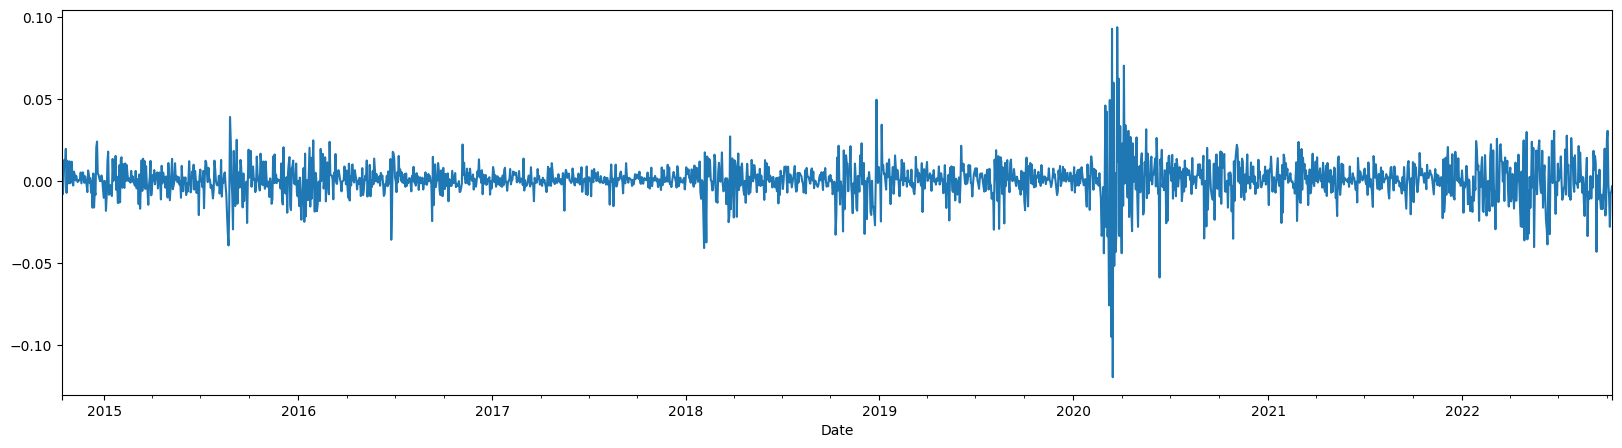

In [66]:
snp_train.returns.plot(figsize=(20,5))
#snp_train.norm_ret.plot(figsize=(20,5))
plt.show()

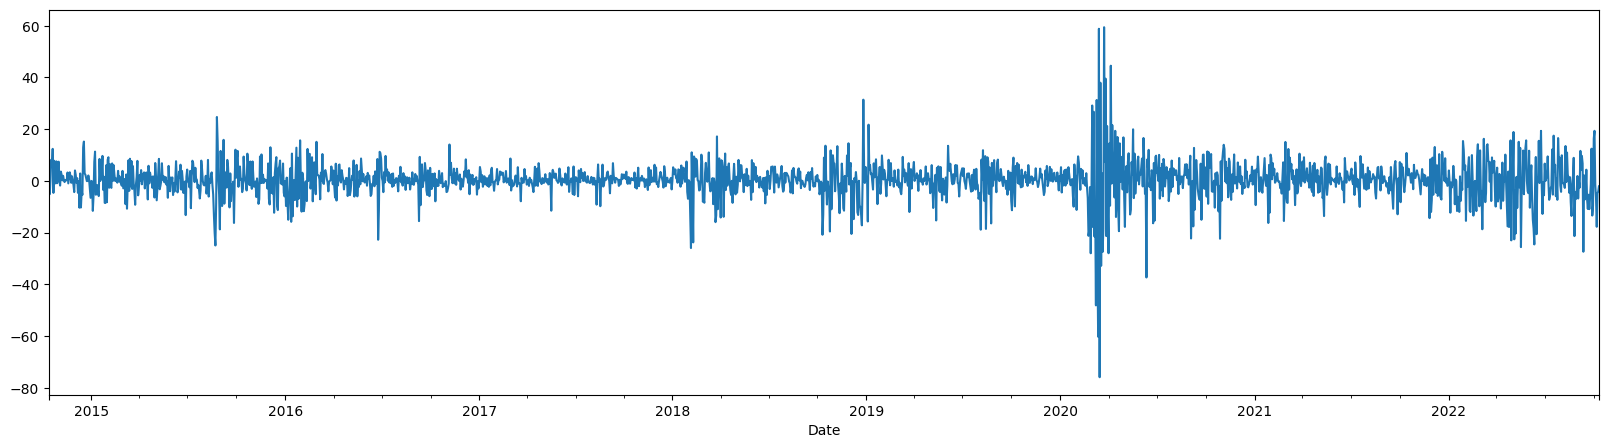

In [67]:
snp_train.norm_ret.plot(figsize=(20,5))
plt.show()

In [68]:
model_norm_ret_ar_1 = ARIMA(snp_train.norm_ret, order = (1,0,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 2087
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7076.759
Date:                Wed, 30 Oct 2024   AIC                          14159.519
Time:                        18:19:48   BIC                          14176.449
Sample:                    10-14-2014   HQIC                         14165.722
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2381      0.142      1.677      0.094      -0.040       0.516
ar.L1         -0.1481      0.008    -18.222      0.000      -0.164      -0.132
sigma2        51.6175      0.624     82.676      0.000      50.394      52.841
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):             15874.29
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               3.61   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
model_norm_ret_ar_9 = ARIMA(snp_train.norm_ret, order = (9,0,0))
results_norm_ret_ar_9 = model_norm_ret_ar_9.fit()
results_norm_ret_ar_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 2087
Model:                 ARIMA(9, 0, 0)   Log Likelihood               -7015.821
Date:                Wed, 30 Oct 2024   AIC                          14053.643
Time:                        18:19:49   BIC                          14115.721
Sample:                    10-14-2014   HQIC                         14076.388
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2387      0.173      1.377      0.168      -0.101       0.578
ar.L1         -0.0995      0.011     -9.124      0.000      -0.121      -0.078
ar.L2          0.0477      0.011      4.160      0.000       0.025       0.070
ar.L3          0.0065      0.012      0.565      0.572      -0.016       0.029
ar.L4         -0.0490      0.012     -3.954      0.000      -0.073      -0.025
ar.L5          0.0048      0.014      0.353      0.724      -0.022       0.031
ar.L6         -0.0872      0.012     -7.121      0.000      -0.111      -0.063
ar.L7          0.1065      0.013      7.939      0.000       0.080       0.133
ar.L8         -0.0695      0.014     -5.121      0.000      -0.096      -0.043
ar.L9          0.1216      0.013      9.617      0.000       0.097       0.146
sigma2        48.6796      0.728     66.898      0.000      47.253      50.106
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              7801.20
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               3.12   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Analysing the residuals

In [70]:
snp_train['res_price'] = results_ar_11.resid
snp_train

/var/folders/zq/5qswcr_s34d2y5t889_6rtb40000gn/T/ipykernel_29714/2318447852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snp_train['res_price'] = results_ar_11.resid


,Close,wn,returns,norm_ret,res_price
Date,,,,,
2014-10-14,1877.699951,3354.408293,0.001579,1.000000,1.761465
2014-10-15,1862.489990,2378.638790,-0.008100,-5.130468,-15.964270
2014-10-16,1862.760010,3675.181949,0.000145,0.091824,-2.581184
2014-10-17,1886.760010,4184.402589,0.012884,8.160362,23.864476
2014-10-20,1904.010010,4220.108548,0.009143,5.790652,18.430295
...,...,...,...,...,...
2022-10-06,3744.520020,3199.899825,-0.010245,-6.488891,-32.755971
2022-10-07,3639.659912,2696.333396,-0.028004,-17.736552,-115.398553
2022-10-10,3612.389893,2228.868659,-0.007492,-4.745475,-24.911040


In [71]:
snp_train.res_price.mean()

0.8338051199707267

In [72]:
snp_train.res_price.var()

1155.8106646958336

In [73]:
sts.adfuller(snp_train.res_price)

(-45.68576874413919,
 0.0,
 0,
 2086,
 {'1%': -3.433488717753819,
  '5%': -2.862926547902014,
  '10%': -2.5675081335553003},
 20400.216810108635)

<function matplotlib.pyplot.show(close=None, block=None)>

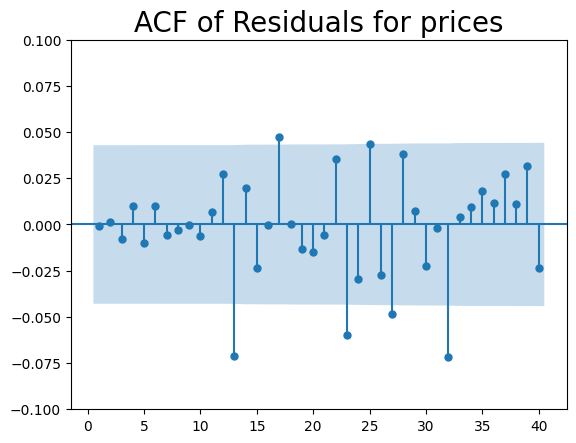

In [74]:
sgt.plot_acf(snp_train.res_price,lags=40,zero=False)
plt.title("ACF of Residuals for prices",size=20)
plt.ylim(-0.1,0.1)
plt.show

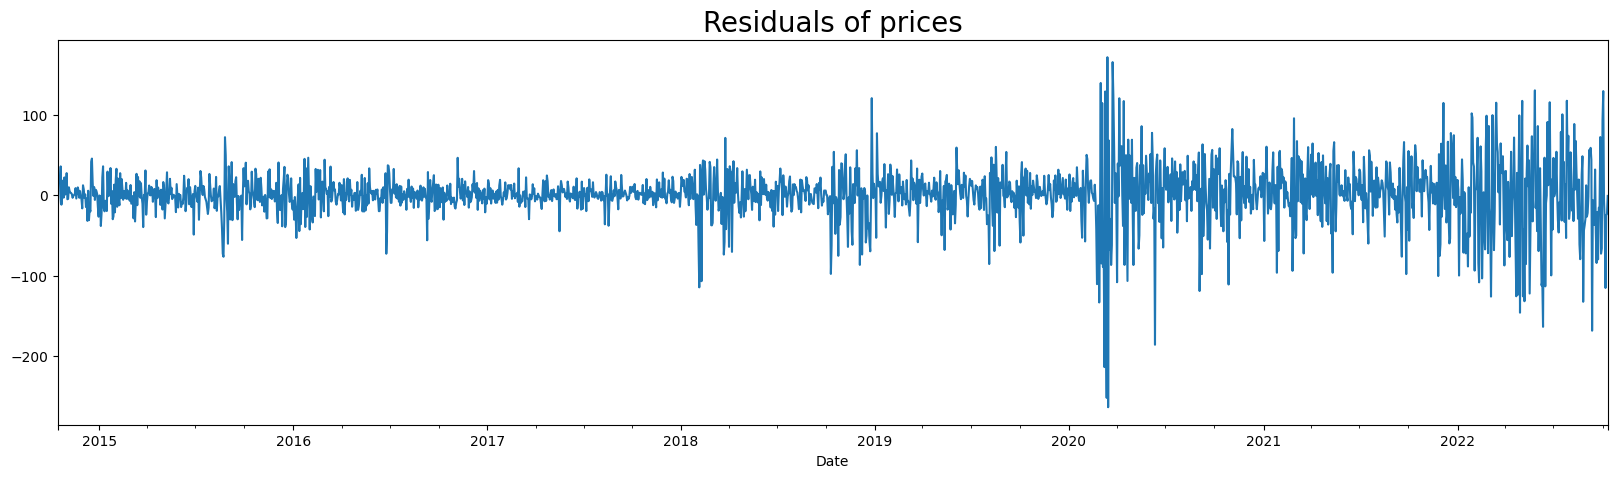

In [75]:
snp_train.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of prices",size=20)
plt.show()

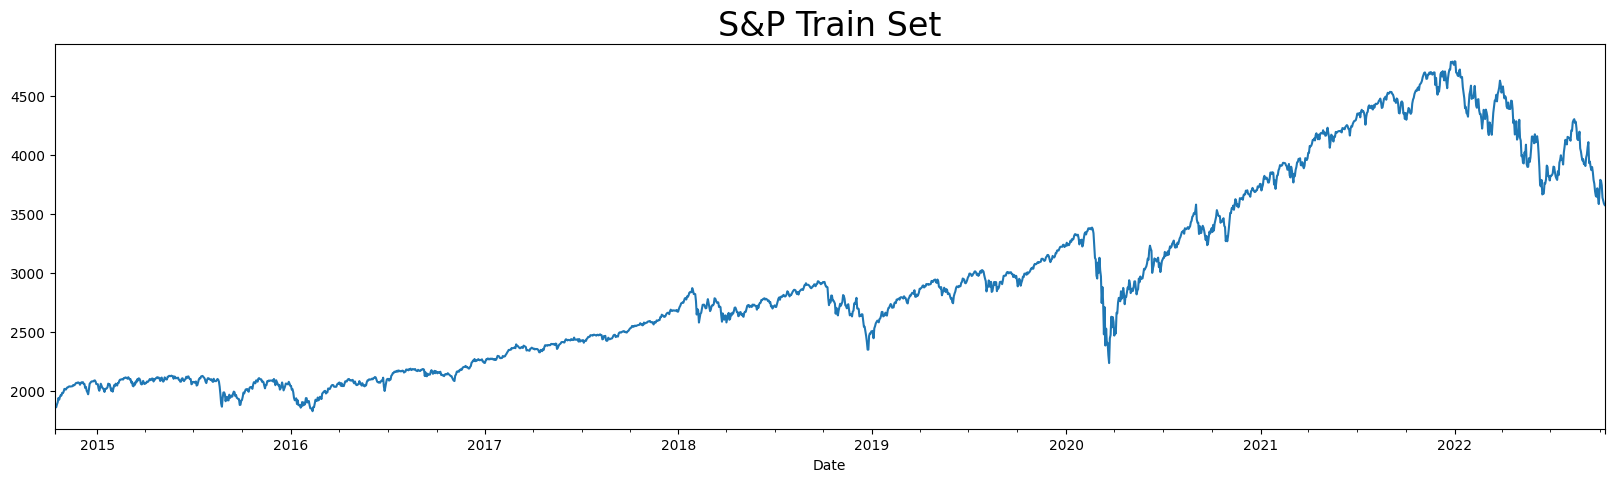

In [76]:
snp_train.Close.plot(figsize=(20,5))
plt.title('S&P Train Set', size=24)
plt.show()

In [77]:
snp_train['res_ret'] = results_ret_ar_9.resid

/var/folders/zq/5qswcr_s34d2y5t889_6rtb40000gn/T/ipykernel_29714/2491150792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snp_train['res_ret'] = results_ret_ar_9.resid


In [78]:
snp_train.res_ret.mean()

2.2083761629819484e-06

In [79]:
snp_train.res_ret.var()

0.0001214290433069305

In [80]:
sts.adfuller(snp_train.res_ret)

(-45.38705213336676,
 0.0,
 0,
 2086,
 {'1%': -3.433488717753819,
  '5%': -2.862926547902014,
  '10%': -2.5675081335553003},
 -12708.439277757912)

<function matplotlib.pyplot.show(close=None, block=None)>

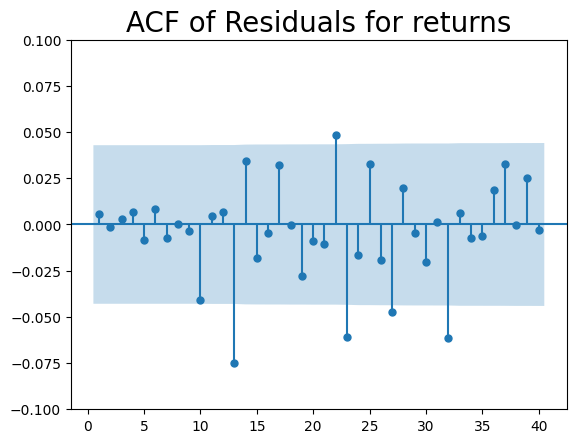

In [81]:
sgt.plot_acf(snp_train.res_ret,lags=40,zero=False)
plt.title("ACF of Residuals for returns",size=20)
plt.ylim(-0.1,0.1)
plt.show

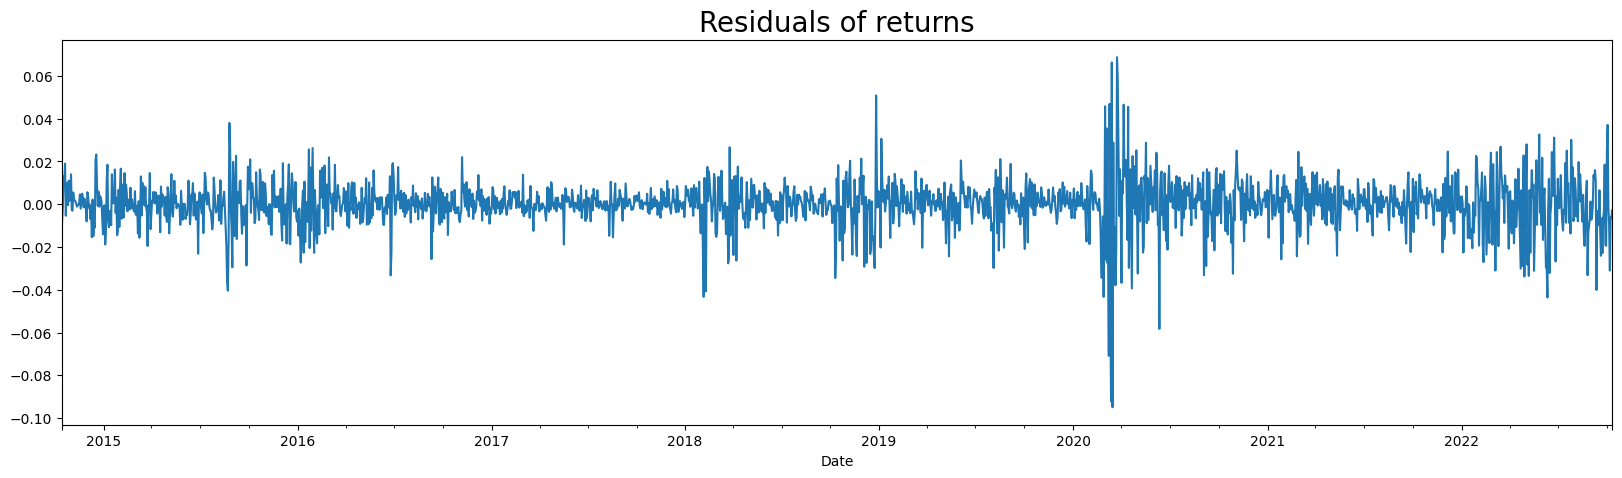

In [82]:
snp_train.res_ret[1:].plot(figsize=(20,5))
plt.title("Residuals of returns",size=20)
plt.show()

In [83]:
snp_train

,Close,wn,returns,norm_ret,res_price,res_ret
Date,,,,,,
2014-10-14,1877.699951,3354.408293,0.001579,1.000000,1.761465,0.001204
2014-10-15,1862.489990,2378.638790,-0.008100,-5.130468,-15.964270,-0.008296
2014-10-16,1862.760010,3675.181949,0.000145,0.091824,-2.581184,-0.001488
2014-10-17,1886.760010,4184.402589,0.012884,8.160362,23.864476,0.013080
2014-10-20,1904.010010,4220.108548,0.009143,5.790652,18.430295,0.010522
...,...,...,...,...,...,...
2022-10-06,3744.520020,3199.899825,-0.010245,-6.488891,-32.755971,-0.009763
2022-10-07,3639.659912,2696.333396,-0.028004,-17.736552,-115.398553,-0.030997
2022-10-10,3612.389893,2228.868659,-0.007492,-4.745475,-24.911040,-0.006223


# ARMA Model

In [84]:
model_ret_ar_1_ma_1 = ARIMA(snp_train.returns, order = (1,0,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
print(results_ret_ar_1_ma_1.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 2087
Model:                 ARIMA(1, 0, 1)   Log Likelihood                6389.365
Date:                Wed, 30 Oct 2024   AIC                         -12770.731
Time:                        18:19:50   BIC                         -12748.157
Sample:                    10-14-2014   HQIC                        -12762.460
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.589      0.112   -8.77e-05       0.001
ar.L1         -0.5292      0.040    -13.131      0.000      -0.608      -0.450
ma.L1          0.3916      0.044      8.936      0.0

/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [85]:
print("\nARMA vs AR ", LLR_test(model_ret_ar_1,model_ret_ar_1_ma_1, DF=1))


ARMA vs AR  0.018


/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [86]:
 model_ret_ar_9_ma_15 = ARIMA(snp_train.returns, order = (9,0,15))
results_ret_ar_9_ma_15 = model_ret_ar_9_ma_15.fit()
print(results_ret_ar_9_ma_15.summary())

/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 2087
Model:                ARIMA(9, 0, 15)   Log Likelihood                6464.413
Date:                Wed, 30 Oct 2024   AIC                         -12876.826
Time:                        18:20:01   BIC                         -12730.095
Sample:                    10-14-2014   HQIC                        -12823.065
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.264      0.024    5.14e-05       0.001
ar.L1         -0.6003      0.225     -2.671      0.008      -1.041      -0.160
ar.L2         -0.4875      0.292     -1.669      0.0

In [87]:
model_ret_ar_4_ma_4 = ARIMA(snp_train.returns, order = (4,0,4))
results_ret_ar_4_ma_4 = model_ret_ar_4_ma_4.fit()
print(results_ret_ar_4_ma_4.summary())

/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 2087
Model:                 ARIMA(4, 0, 4)   Log Likelihood                6383.299
Date:                Wed, 30 Oct 2024   AIC                         -12746.598
Time:                        18:20:03   BIC                         -12690.163
Sample:                    10-14-2014   HQIC                        -12725.921
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.187      0.235      -0.000       0.001
ar.L1         -0.2871      0.085     -3.388      0.001      -0.453      -0.121
ar.L2          0.4298      0.112      3.845      0.0

/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [88]:
LLR_test(model_ret_ar_1_ma_1,model_ret_ar_4_ma_4, DF=6)

/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1.0

In [89]:
model_ret_ar_2_ma_2 = ARIMA(snp_train.returns, order = (2,0,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
print(results_ret_ar_2_ma_2.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 2087
Model:                 ARIMA(2, 0, 2)   Log Likelihood                6391.312
Date:                Wed, 30 Oct 2024   AIC                         -12770.624
Time:                        18:20:05   BIC                         -12736.763
Sample:                    10-14-2014   HQIC                        -12758.217
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.435      0.151      -0.000       0.001
ar.L1         -0.2598      0.558     -0.465      0.642      -1.354       0.835
ar.L2          0.0770      0.312      0.247      0.8

/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [90]:
snp_train.returns

Date
2014-10-14    0.001579
2014-10-15   -0.008100
2014-10-16    0.000145
2014-10-17    0.012884
2014-10-20    0.009143
                ...   
2022-10-06   -0.010245
2022-10-07   -0.028004
2022-10-10   -0.007492
2022-10-11   -0.006519
2022-10-12   -0.003291
Freq: B, Name: returns, Length: 2087, dtype: float64

In [91]:
model_ret_ar_5_ma_5 = ARIMA(snp_train.returns, order = (5,0,5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
print(results_ret_ar_5_ma_5.summary())

/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 2087
Model:                 ARIMA(5, 0, 5)   Log Likelihood                6410.662
Date:                Wed, 30 Oct 2024   AIC                         -12797.323
Time:                        18:20:07   BIC                         -12729.601
Sample:                    10-14-2014   HQIC                        -12772.511
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.576e-06      0.000     -0.006      0.995      -0.001       0.001
ar.L1         -0.0465      0.244     -0.190      0.849      -0.525       0.432
ar.L2          0.3168      0.204      1.556      0.1

/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [92]:
model_ret_ar_2_ma_1 = ARIMA(snp_train.returns, order = (2,0,1))
results_ret_ar_2_ma_1 = model_ret_ar_2_ma_1.fit()
print(results_ret_ar_2_ma_1.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 2087
Model:                 ARIMA(2, 0, 1)   Log Likelihood                6391.987
Date:                Wed, 30 Oct 2024   AIC                         -12773.974
Time:                        18:20:07   BIC                         -12745.756
Sample:                    10-14-2014   HQIC                        -12763.635
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.450      0.147      -0.000       0.001
ar.L1         -0.1221      0.139     -0.880      0.379      -0.394       0.150
ar.L2          0.0742      0.023      3.187      0.0

In [93]:
model_ret_ar_1_ma_2 = ARIMA(snp_train.returns, order = (1,0,2))
results_ret_ar_1_ma_2 = model_ret_ar_1_ma_2.fit()
print(results_ret_ar_1_ma_2.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 2087
Model:                 ARIMA(1, 0, 2)   Log Likelihood                6391.999
Date:                Wed, 30 Oct 2024   AIC                         -12773.997
Time:                        18:20:07   BIC                         -12745.780
Sample:                    10-14-2014   HQIC                        -12763.659
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.514      0.130      -0.000       0.001
ar.L1         -0.3552      0.099     -3.596      0.000      -0.549      -0.162
ma.L1          0.2177      0.096      2.265      0.0

In [94]:
model_ret_ar_1_ma_3 = ARIMA(snp_train.returns, order = (1,0,3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
print(results_ret_ar_1_ma_3.summary())

/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 2087
Model:                 ARIMA(1, 0, 3)   Log Likelihood                6392.902
Date:                Wed, 30 Oct 2024   AIC                         -12773.804
Time:                        18:20:08   BIC                         -12739.943
Sample:                    10-14-2014   HQIC                        -12761.398
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.430      0.153      -0.000       0.001
ar.L1         -0.0683      0.334     -0.204      0.838      -0.724       0.587
ma.L1         -0.0699      0.331     -0.211      0.8

In [95]:
LLR_test(model_ret_ar_1_ma_1,model_ret_ar_1_ma_2)

/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.022

# Analysing residuals for ARMA

In [96]:
snp_train['res_ret_ar_1_ma_2'] = results_ret_ar_1_ma_2.resid

/var/folders/zq/5qswcr_s34d2y5t889_6rtb40000gn/T/ipykernel_29714/3496013437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snp_train['res_ret_ar_1_ma_2'] = results_ret_ar_1_ma_2.resid


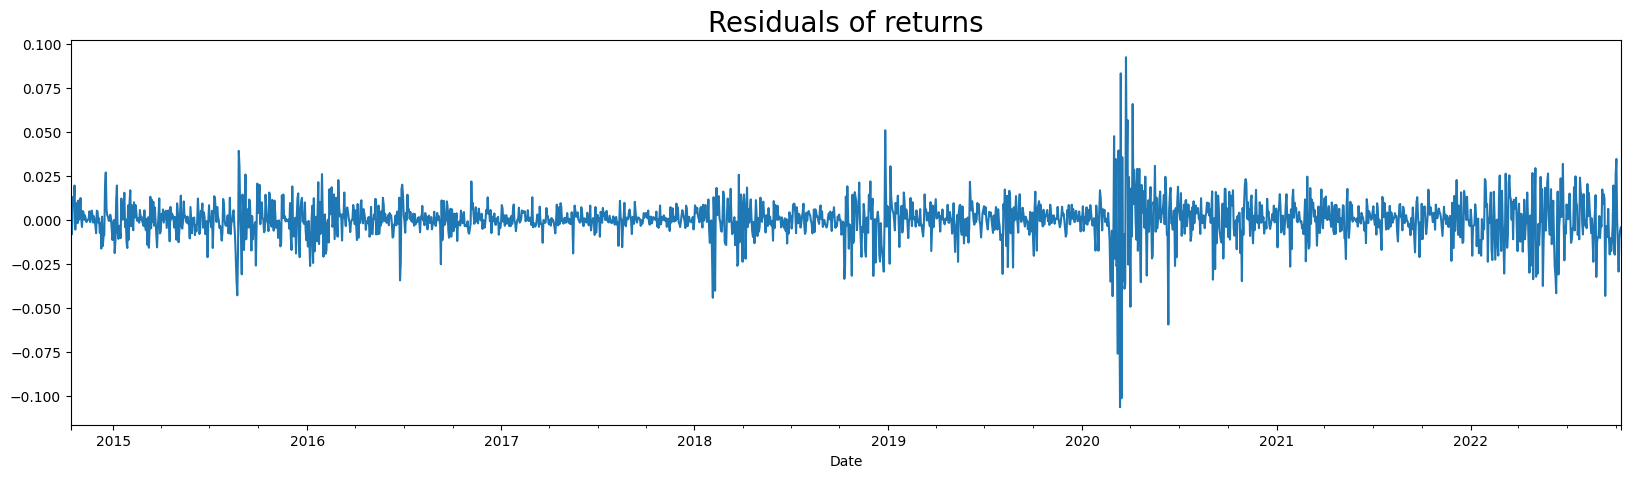

In [97]:
snp_train.res_ret_ar_1_ma_2.plot(figsize=(20,5))
plt.title("Residuals of returns",size=20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

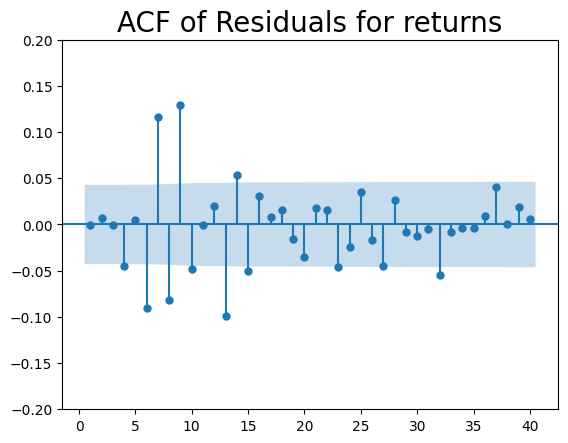

In [98]:
sgt.plot_acf(snp_train.res_ret_ar_1_ma_2, zero = False, lags=40)
plt.title("ACF of Residuals for returns",size=20)
plt.ylim(-0.2,0.2)
plt.show

In [99]:
model_ret_ar_9_ma_2 = ARIMA(snp_train.returns, order = (9,0,2))
results_ret_ar_9_ma_2 = model_ret_ar_9_ma_2.fit()
print(results_ret_ar_9_ma_2.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 2087
Model:                 ARIMA(9, 0, 2)   Log Likelihood                6446.711
Date:                Wed, 30 Oct 2024   AIC                         -12867.422
Time:                        18:20:09   BIC                         -12794.057
Sample:                    10-14-2014   HQIC                        -12840.542
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.353      0.176      -0.000       0.001
ar.L1         -0.0522      0.134     -0.390      0.697      -0.315       0.211
ar.L2          0.0276      0.135      0.204      0.8

In [100]:
model_ret_ar_5_ma_7 = ARIMA(snp_train.returns, order = (5,0,7))
results_ret_ar_5_ma_7 = model_ret_ar_5_ma_7.fit()
print(results_ret_ar_5_ma_7.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 2087
Model:                 ARIMA(5, 0, 7)   Log Likelihood                6448.211
Date:                Wed, 30 Oct 2024   AIC                         -12868.422
Time:                        18:20:11   BIC                         -12789.413
Sample:                    10-14-2014   HQIC                        -12839.474
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.479      0.139      -0.000       0.001
ar.L1         -0.9409      0.121     -7.781      0.000      -1.178      -0.704
ar.L2          0.2829      0.142      1.989      0.0

In [101]:
LLR_test(model_ret_ar_1_ma_2,model_ret_ar_5_ma_7, DF=9)

0.0

In [102]:
snp_train['res_ret_ar_5_ma_7'] = results_ret_ar_5_ma_7.resid

/var/folders/zq/5qswcr_s34d2y5t889_6rtb40000gn/T/ipykernel_29714/4128219257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snp_train['res_ret_ar_5_ma_7'] = results_ret_ar_5_ma_7.resid


<function matplotlib.pyplot.show(close=None, block=None)>

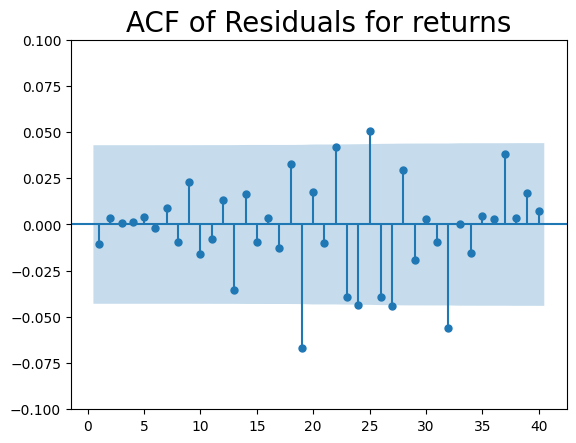

In [103]:
sgt.plot_acf(snp_train.res_ret_ar_5_ma_7, zero = False, lags=40)
plt.title("ACF of Residuals for returns",size=20)
plt.ylim(-0.1,0.1)
plt.show

# ARIMA Model

In [104]:
model_ar1_i1_ma1 = ARIMA(snp_train.Close,order=(1,1,1))
results_ar1_i1_ma1 = model_ar1_i1_ma1.fit()
results_ar1_i1_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2087
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10363.999
Date:                Wed, 30 Oct 2024   AIC                          20733.999
Time:                        18:20:13   BIC                          20750.928
Sample:                    10-14-2014   HQIC                         20740.201
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4394      0.065     -6.792      0.000      -0.566      -0.313
ma.L1          0.3314      0.068      4.845      0.000       0.197       0.465
sigma2      1211.6260     16.380     73.969      0.000    1179.521    1243.731
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              8347.30
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               9.98   Skew:                            -0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/var/folders/zq/5qswcr_s34d2y5t889_6rtb40000gn/T/ipykernel_29714/2798249014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snp_train['res_ar1_i1_ma1'] = results_ar1_i1_ma1.resid


<function matplotlib.pyplot.show(close=None, block=None)>

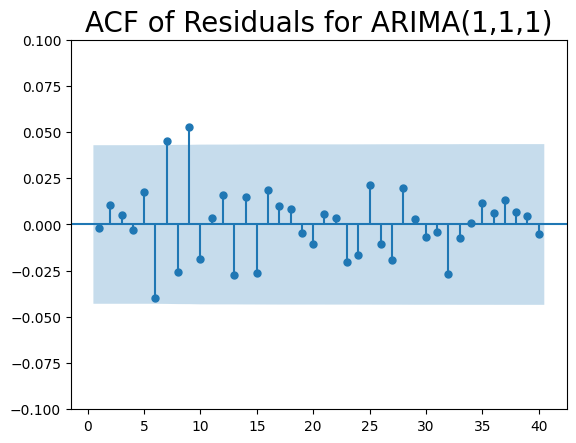

In [105]:
snp_train['res_ar1_i1_ma1'] = results_ar1_i1_ma1.resid
sgt.plot_acf(snp_train.res_ar1_i1_ma1, zero = False, lags=40)
plt.title("ACF of Residuals for ARIMA(1,1,1)",size=20)
plt.ylim(-0.1,0.1)
plt.show

In [106]:
model_ar9_i1_ma7 = ARIMA(snp_train.Close,order=(9,1,7))
results_ar9_i1_ma7 = model_ar9_i1_ma7.fit()
results_ar9_i1_ma7.summary()

/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2087
Model:                 ARIMA(9, 1, 7)   Log Likelihood              -10299.109
Date:                Wed, 30 Oct 2024   AIC                          20632.217
Time:                        18:20:15   BIC                          20728.148
Sample:                    10-14-2014   HQIC                         20667.366
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2314      0.206     -5.983      0.000      -1.635      -0.828
ar.L2         -0.6416      0.241     -2.658      0.008      -1.115      -0.169
ar.L3          0.0789      0.092      0.858      0.391      -0.101       0.259
ar.L4         -0.4336      0.098     -4.438      0.000      -0.625      -0.242
ar.L5         -1.0165      0.170     -5.990      0.000      -1.349      -0.684
ar.L6         -1.0098      0.245     -4.126      0.000      -1.489      -0.530
ar.L7         -0.4295      0.127     -3.382      0.001      -0.678      -0.181
ar.L8         -0.0042      0.025     -0.172      0.864      -0.053       0.044
ar.L9          0.1041      0.024      4.248      0.000       0.056       0.152
ma.L1          1.1635      0.206      5.654      0.000       0.760       1.567
ma.L2          0.6028      0.229      2.637      0.008       0.155       1.051
ma.L3         -0.0767      0.085     -0.905      0.366      -0.243       0.089
ma.L4          0.4654      0.097      4.815      0.000       0.276       0.655
ma.L5          0.9997      0.164      6.103      0.000       0.679       1.321
ma.L6          0.9112      0.232      3.926      0.000       0.456       1.366
ma.L7          0.4266      0.111      3.842      0.000       0.209       0.644
sigma2      1147.4133     19.036     60.274      0.000    1110.102    1184.724
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              5364.53
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               8.52   Skew:                            -0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:
model_ar95_i1_ma7 = ARIMA(snp_train.Close,order=(5,1,7))
results_ar5_i1_ma7 = model_ar95_i1_ma7.fit()
results_ar5_i1_ma7.summary()

/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2087
Model:                 ARIMA(5, 1, 7)   Log Likelihood              -10313.232
Date:                Wed, 30 Oct 2024   AIC                          20652.464
Time:                        18:20:17   BIC                          20725.823
Sample:                    10-14-2014   HQIC                         20679.343
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6932      0.102     -6.769      0.000      -0.894      -0.492
ar.L2          0.5637      0.052     10.787      0.000       0.461       0.666
ar.L3          0.1573      0.073      2.154      0.031       0.014       0.301
ar.L4         -0.9207      0.053    -17.464      0.000      -1.024      -0.817
ar.L5         -0.4989      0.085     -5.883      0.000      -0.665      -0.333
ma.L1          0.6334      0.102      6.200      0.000       0.433       0.834
ma.L2         -0.5608      0.051    -10.978      0.000      -0.661      -0.461
ma.L3         -0.1178      0.076     -1.549      0.121      -0.267       0.031
ma.L4          0.8734      0.056     15.712      0.000       0.764       0.982
ma.L5          0.4334      0.084      5.149      0.000       0.268       0.598
ma.L6         -0.0476      0.016     -2.954      0.003      -0.079      -0.016
ma.L7          0.0670      0.019      3.450      0.001       0.029       0.105
sigma2      1167.5513     18.914     61.729      0.000    1130.480    1204.622
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):              5818.05
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               8.97   Skew:                            -0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [108]:
model_ar9_i1_ma9 = ARIMA(snp_train.Close,order=(9,1,4))
results_ar9_i1_ma9 = model_ar9_i1_ma9.fit()
results_ar9_i1_ma9.summary()

/Users/eloi/opt/anaconda3/envs/tidy_fiance_environment/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2087
Model:                 ARIMA(9, 1, 4)   Log Likelihood              -10311.354
Date:                Wed, 30 Oct 2024   AIC                          20650.707
Time:                        18:20:19   BIC                          20729.709
Sample:                    10-14-2014   HQIC                         20679.654
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0641      0.054      1.187      0.235      -0.042       0.170
ar.L2          0.4714      0.046     10.207      0.000       0.381       0.562
ar.L3         -0.1747      0.040     -4.315      0.000      -0.254      -0.095
ar.L4         -0.7132      0.043    -16.428      0.000      -0.798      -0.628
ar.L5         -0.0174      0.018     -0.982      0.326      -0.052       0.017
ar.L6         -0.0036      0.013     -0.288      0.773      -0.028       0.021
ar.L7          0.0781      0.016      4.997      0.000       0.047       0.109
ar.L8         -0.0720      0.019     -3.862      0.000      -0.109      -0.035
ar.L9          0.0842      0.018      4.617      0.000       0.048       0.120
ma.L1         -0.1258      0.051     -2.466      0.014      -0.226      -0.026
ma.L2         -0.4197      0.047     -8.945      0.000      -0.512      -0.328
ma.L3          0.1852      0.038      4.889      0.000       0.111       0.259
ma.L4          0.6885      0.043     15.938      0.000       0.604       0.773
sigma2      1154.0103     18.393     62.743      0.000    1117.961    1190.060
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              5660.20
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               9.00   Skew:                            -0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/var/folders/zq/5qswcr_s34d2y5t889_6rtb40000gn/T/ipykernel_29714/4197135705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snp_train['res_ar9_i1_ma7'] = results_ar9_i1_ma7.resid


<function matplotlib.pyplot.show(close=None, block=None)>

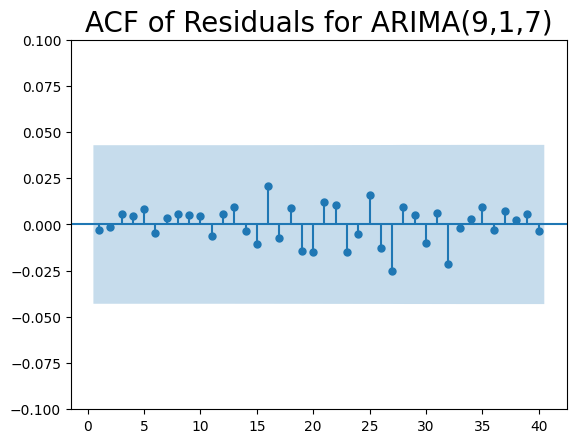

In [109]:
snp_train['res_ar9_i1_ma7'] = results_ar9_i1_ma7.resid
sgt.plot_acf(snp_train.res_ar9_i1_ma7, zero = False, lags=40)
plt.title("ACF of Residuals for ARIMA(9,1,7)",size=20)
plt.ylim(-0.1,0.1)
plt.show

In [110]:
snp_train['delta_prices'] =  snp_train.Close.diff(1)

/var/folders/zq/5qswcr_s34d2y5t889_6rtb40000gn/T/ipykernel_29714/3735252331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snp_train['delta_prices'] =  snp_train.Close.diff(1)


In [111]:
snp_train

,Close,wn,returns,norm_ret,res_price,res_ret,res_ret_ar_1_ma_2,res_ret_ar_5_ma_7,res_ar1_i1_ma1,res_ar9_i1_ma7,delta_prices
Date,,,,,,,,,,,
2014-10-14,1877.699951,3354.408293,0.001579,1.000000,1.761465,0.001204,0.001205,0.001205,1877.699951,1877.699951,NaN
2014-10-15,1862.489990,2378.638790,-0.008100,-5.130468,-15.964270,-0.008296,-0.008296,-0.008312,-14.950152,-14.955190,-15.209961
2014-10-16,1862.760010,3675.181949,0.000145,0.091824,-2.581184,-0.001488,-0.001485,-0.001372,-1.529095,-1.535174,0.270020
2014-10-17,1886.760010,4184.402589,0.012884,8.160362,23.864476,0.013080,0.013078,0.013060,24.624644,24.939091,24.000000
2014-10-20,1904.010010,4220.108548,0.009143,5.790652,18.430295,0.010522,0.010423,0.010367,19.636091,19.761478,17.250000
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-06,3744.520020,3199.899825,-0.010245,-6.488891,-32.755971,-0.009763,-0.012795,-0.007696,-42.429568,-17.916068,-38.760010
2022-10-07,3639.659912,2696.333396,-0.028004,-17.736552,-115.398553,-0.030997,-0.029357,-0.034032,-107.829537,-114.832384,-104.860107
2022-10-10,3612.389893,2228.868659,-0.007492,-4.745475,-24.911040,-0.006223,-0.011049,-0.004034,-37.609519,-16.970517,-27.270020


In [112]:
model_delta_ar1_i1_ma1 = ARIMA(snp_train.delta_prices[1:],order=(1,0,1))
results_delta_ar1_i1_ma1 = model_delta_ar1_i1_ma1.fit()
results_delta_ar1_i1_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 2086
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -10363.332
Date:                Wed, 30 Oct 2024   AIC                          20734.664
Time:                        18:20:19   BIC                          20757.236
Sample:                    10-15-2014   HQIC                         20742.935
                         - 10-12-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8147      0.748      1.089      0.276      -0.652       2.281
ar.L1         -0.4385      0.065     -6.703      0.000      -0.567      -0.310
ma.L1          0.3301      0.069      4.762      0.000       0.194       0.466
sigma2      1210.8456     17.146     70.618      0.000    1177.239    1244.452
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):              8340.88
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):              10.00   Skew:                            -0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [113]:
sts.adfuller(snp_train.delta_prices[1:])

(-9.541873057850983,
 2.7130163675690677e-16,
 26,
 2059,
 {'1%': -3.433529927750221,
  '5%': -2.86294474297357,
  '10%': -2.5675178213960623},
 20397.0706003727)

# Forecast

In [114]:
snp_train.tail()

,Close,wn,returns,norm_ret,res_price,res_ret,res_ret_ar_1_ma_2,res_ret_ar_5_ma_7,res_ar1_i1_ma1,res_ar9_i1_ma7,delta_prices
Date,,,,,,,,,,,
2022-10-06,3744.520020,3199.899825,-0.010245,-6.488891,-32.755971,-0.009763,-0.012795,-0.007696,-42.429568,-17.916068,-38.760010
2022-10-07,3639.659912,2696.333396,-0.028004,-17.736552,-115.398553,-0.030997,-0.029357,-0.034032,-107.829537,-114.832384,-104.860107
2022-10-10,3612.389893,2228.868659,-0.007492,-4.745475,-24.911040,-0.006223,-0.011049,-0.004034,-37.609519,-16.970517,-27.270020
2022-10-11,3588.840088,4193.117088,-0.006519,-4.129027,-23.386151,-0.006509,-0.006123,-0.007614,-23.067852,-8.165282,-23.549805
2022-10-12,3577.030029,3433.554914,-0.003291,-2.084265,-0.839090,-0.002884,-0.004344,-0.003727,-14.512891,-14.969416,-11.810059


In [115]:
snp_test.head()

,Close
Date,
2022-10-13,3669.909912
2022-10-14,3583.070068
2022-10-17,3677.949951
2022-10-18,3719.979980
2022-10-19,3695.159912


In [135]:
start_date = "2022-10-13"
end_date = "2024-10-01"

In [136]:
snp_test_pred = results_ar.predict(start = start_date, end = end_date)

<function matplotlib.pyplot.show(close=None, block=None)>

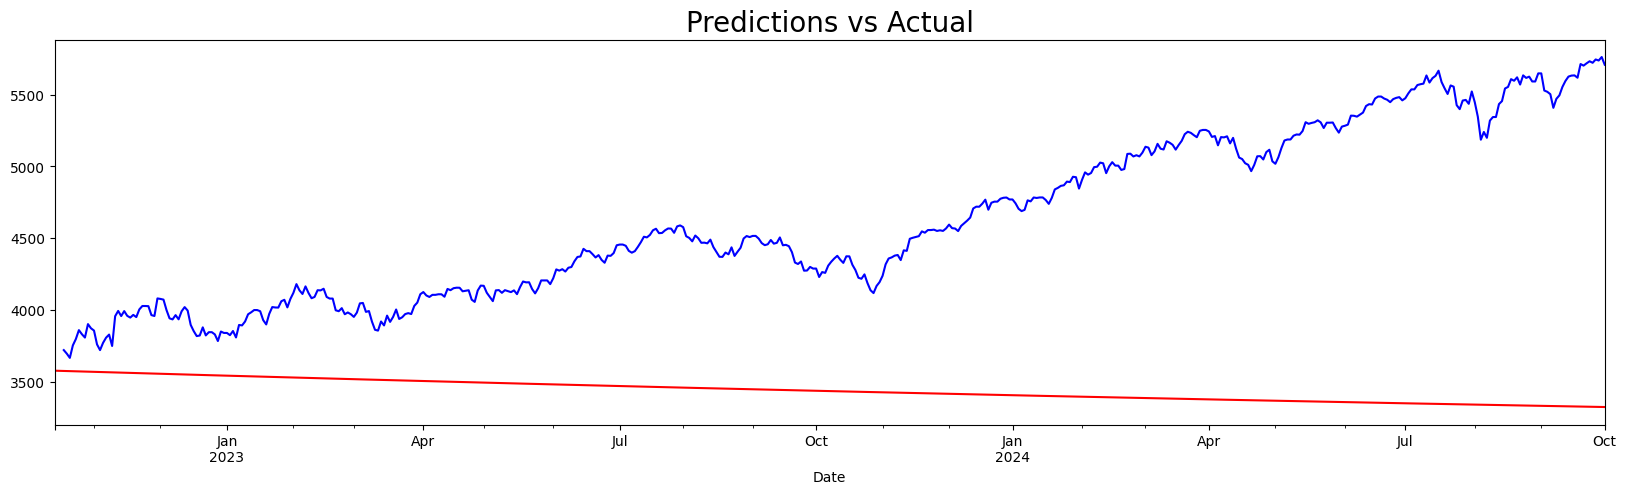

In [137]:
snp_test_pred[start_date:end_date].plot(figsize = (20,5), color = "red")
snp_test.Close[start_date:end_date].plot( color = "blue")
plt.title("Predictions vs Actual", size =20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

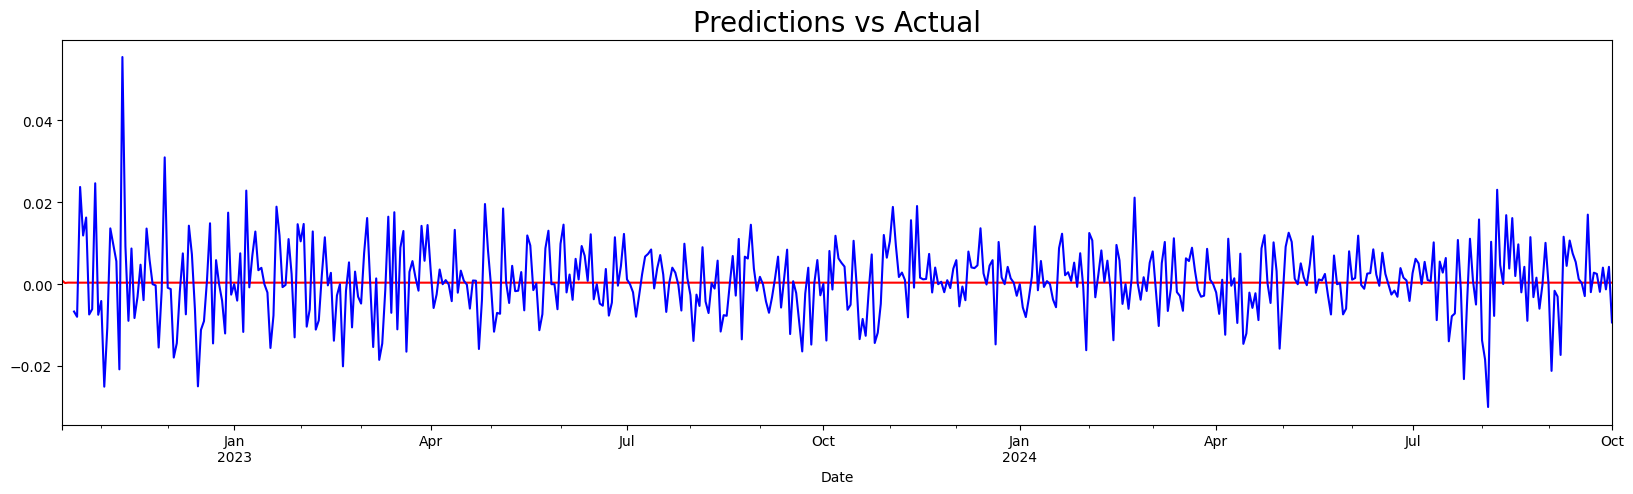

In [138]:
snp_test['returns'] = snp_test.Close.pct_change()
snp_test=snp_test.iloc[1:]

snp_test_pred_ret = results_ret_ar_1.predict(start = start_date, end = end_date)

snp_test_pred_ret[start_date:end_date].plot(figsize = (20,5), color = "red")
snp_test.returns[start_date:end_date].plot( color = "blue")
plt.title("Predictions vs Actual", size =20)
plt.show